<a href="https://colab.research.google.com/github/jiukeem/deeplearning_from_scratch/blob/master/convolution_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train_all.shape, y_train_all.shape

((60000, 28, 28), (60000,))

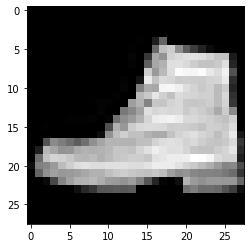

In [ ]:
plt.imshow(x_train_all[3045], cmap='gray')

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [ ]:
x_train = x_train / 255
x_val = x_val / 255

In [ ]:
class ConvolutionNetwork:
  def __init__(self):
    self.conv_w = None
    self.W1 = None
    self.b1 = None
    self.W2 = None
    self.b2 = None

  def forward_prop(self, X):
    c_out = tf.nn.conv2d(X, self.conv_w, strides=1, padding='SAME')
    r_out = tf.nn.relu(c_out)
    p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
    f_out = tf.reshape(p_out, [X.shape[0]], -1)
    Z1 = tf.matmul(f_out, self.W1) + self.b1 
    # 위의 연산들은 tensor 형태로 결과를 return함
    # 미분까지 계속 텐서 형태로 연산하기 위해 numpy()로 바꾸지 않고  np.dot대신 tf.matmul을 사용하는듯?
    # f_out을 2d로 바꿨으니 np.dot이 3d 이상을 못다뤄서 그러는 건 아닌 것 같다.
    A1 = self.sigmoid(Z1)
    Z2 = tf.matmul(A1, self.W2) + self.b2
    return Z2
    # 텐서플로 로스계산은 softmax와 cross entropy가 합쳐져 있다. 그래서 A2는 계산하지 않음
    # Z가 전체적으로 증감하는 것이 A2에 영향을 주지 않기 때문(A2는 z들 간의 비율이니까)

  def training(self, X, Y):
    with tf.GradientTape() as tape:
      # tape 객체는 with 로 감싸진 연산을 기록하고 텐서플로 변수를 추적한다.
      Z2 = self.forward_prop(X)
      loss = tf.nn.softmax_cross_entropy_with_logits(Y, Z2)
      loss = tf.reduce_mean(loss)
      # tf.reduce_mean 은 평균을 계산한다. 각 샘플 별로 로스가 뜨기 때문에 평균낸거임
    weights_list = [self.conv_w, self.conv_b, self.W1, self.b1, self.W2, self.b2]
    grads = tape.gradient(loss, weights_list)
    self.optimizer.apply_gradients(zip(grads, weights_list))


